1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)

### Importing necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading Dataset

In [2]:
iris = pd.read_excel("C:/Users/Ammu/Downloads/iris.xls")
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Pre-processing

#### 1.Missing Values handling

In [3]:
#check for missing values and data types
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# missing values in SL,SW,PL.

In [5]:
for i in ['SL','SW','PL']:
    iris[i]= iris[i].fillna(iris[i].median())
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# no missing values

#### 2. Encoding

In [7]:
# import package
from sklearn.preprocessing import LabelEncoder

In [8]:
# rename function
le=LabelEncoder()

In [9]:
# encode cotinents
iris['Classification']=le.fit_transform(iris['Classification'])
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [10]:
# Original range of data.
iris.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,1.000000
std,0.808567,0.421995,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 3. Scaling

In [11]:
# For all the 4 columns, change the range using Min-Max scaling
for i in ['SL','SW','PL','PW']:
    iris[i] = (iris[i]-min(iris[i]))/(max(iris[i])-min(iris[i]))
iris.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778,1.000000
std,0.224602,0.175831,0.293123,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.531250,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


#### 4. Outlier Analysis

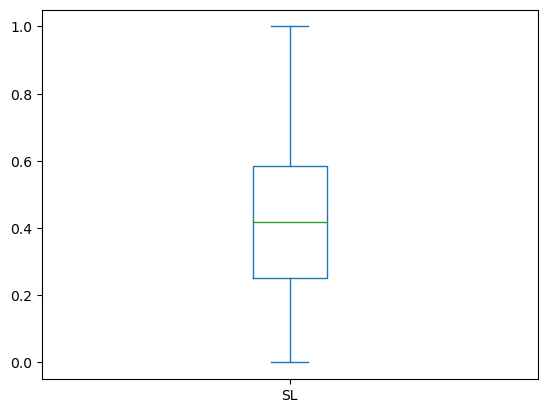

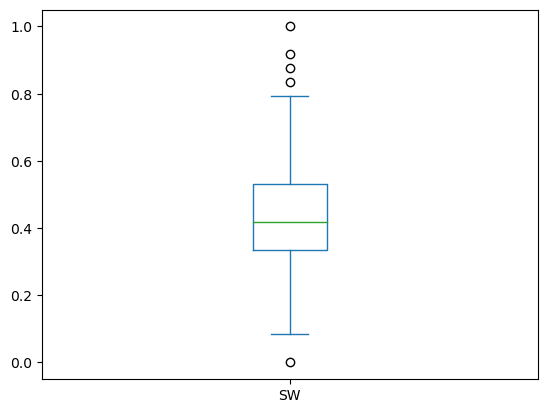

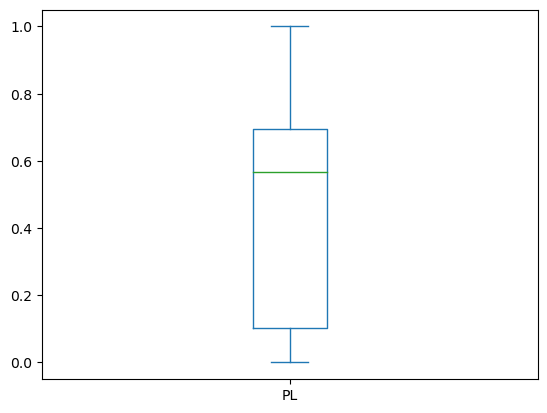

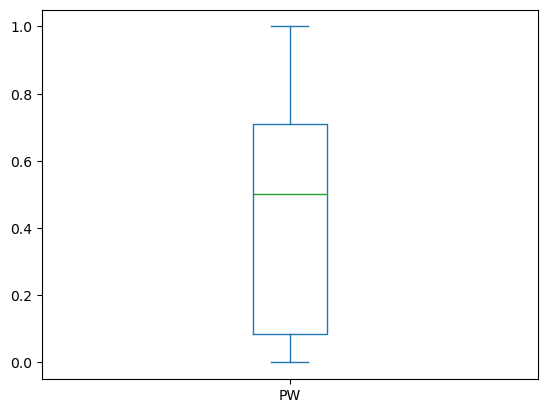

In [12]:
for i in ['SL','SW','PL','PW']:
    iris[i].plot.box()
    plt.show()

In [13]:
# Outliers in SW
up = np.quantile(iris['SW'],0.75)+1.5*(np.quantile(iris['SW'],0.75)-np.quantile(iris['SW'],0.25))
low = np.quantile(iris['SW'],0.25)-1.5*(np.quantile(iris['SW'],0.75)-np.quantile(iris['SW'],0.25))

In [14]:
# retrurn the indices of outlier values
sw=iris['SW']
outlier = [ind for ind in sw.index.values if (sw[ind]>=up or sw[ind]<=low)]
outlier

[14, 15, 32, 33, 60]

In [15]:
# remove outliers
iris = iris.drop([14, 15, 32, 33, 60])

#### 5. Significance of Variables

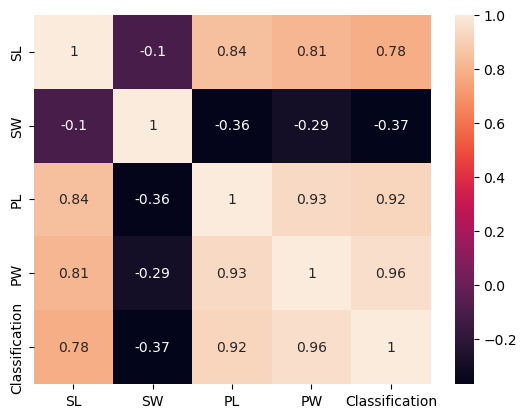

In [16]:
#Use heatmap to study linear relationship and check if there any variables to be removed
sns.heatmap(iris.corr(),annot=True)
plt.show()

In [17]:
# No variables dropped

### Classification

Classifications tried here include
1. Logistic Regression
2. SVM
3. KNN

In [18]:
# Split the data into Independent and Dependent variables
x=iris.iloc[:,0:4]
y=iris.Classification

In [19]:
# Split the data into training and testing dataset in the ratio, 75:25

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#### 1. Logistic 

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
model = lr.fit(x_train, y_train)

In [24]:
y_pred=model.predict(x_test)
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2])

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [26]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='micro')) 
print(recall_score(y_test,y_pred,zero_division=0,average='micro'))

0.9459459459459459
0.9459459459459459
0.9459459459459459


In [27]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]], dtype=int64)

#### 2. KNN

In [28]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  

In [29]:
# k means clustering and fitting
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [30]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
#Creating the Confusion matrix  
confusion_matrix(y_test, y_pred)  

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [32]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='micro')) 
print(recall_score(y_test,y_pred,zero_division=0,average='micro'))

0.9459459459459459
0.9459459459459459
0.9459459459459459


#### 3. SVM

In [33]:
from sklearn.svm import SVC # "Support vector classifier"

In [34]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [35]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [36]:
#Creating the Confusion matrix  
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 11]], dtype=int64)

In [37]:
print(accuracy_score(y_test,y_pred))

0.918918918918919


In [38]:
print(precision_score(y_test,y_pred,average='micro')) 

0.918918918918919


#### 4. Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier  

In [40]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 

In [42]:
confusion_matrix(y_test, y_pred)  

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [43]:
print(accuracy_score(y_test,y_pred))

0.918918918918919


In [44]:
print(precision_score(y_test,y_pred,average='micro')) 

0.918918918918919


#### 5. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier  

In [46]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_pred= classifier.predict(x_test)  

In [48]:
confusion_matrix(y_test, y_pred)  

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [49]:
print(accuracy_score(y_test,y_pred))

0.918918918918919


In [50]:
print(precision_score(y_test,y_pred,average='micro')) 

0.918918918918919


In [51]:
# The algorithms imply that the best one is Logistic Regression, KNN and Random Forest algorithms 